# Education Key Performance Indicator Analysis
__(Phase 2)__
***
<pre>
Name: Tenicka Norwood
</pre>

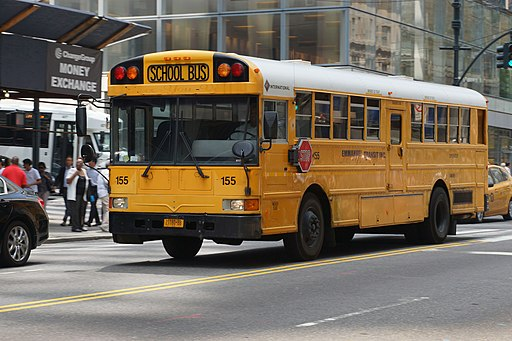
(Source:Wikimedia Commons [https://commons.wikimedia.org/)]

# Digging into Data after Joining Flatiron
***

Now before I start exploring data, I look at:
* How clean is it?
* How was it collected?
* What license is it available under?

I have learned that importing libraries and visualization packages allows me to be more effective in crafting insights, because my code can access other tools, projects become both more manageable and more impactful. 

My favorite libraries and visualization packages so far include: 
* <code> sqlite3 </code>: a library that allows accessing and manipulating databases
* <code> pandas </code>: a data analysis and manipulation library that allows flexible reshaping of dataframes
* <code> seaborn </code>: a data visualization library based on matplot lib

Right now, I am looking at data from: 

* [The New York State Education Department](https://data.nysed.gov/)

* [NYC Open Data](https://data.cityofnewyork.us/Education/2005-2015-Graduation-Outcomes/qk7d-gecv)

So I will import a set of libraries to explore this data:

# Data Understanding

For over two decades, the New York State Performance Standards Consortium has focused on in-depth literacy, problem solving, research and methodolgy as a more holistic representation of student performance.  The consortium serves around 12,000 students in New York State and has a waiver from the majority of Regents exams.  Within this project, I will analyze the graduation outcomes for subgroups students in Consortium Schools and compare those outcomes to New York City Public Schools according to data hosted by the NYSED and on NYC Open Data.

# Importing appropriate libraries and visualization packages 

Building code that is modular and easy to use depends on being able to leverage libraries and visualization packages to access useful code in a way that is efficient and easily reproducible.  In particular the folowing libaries:
* <code> pandas </code>               &rarr;
* <code> numpy </code>                &rarr;
* <code> seaborn </code>              &rarr;
* <code> matplotlib </code>           &rarr;

In [1]:
# Import libraries and visualization packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# Allow plots to display and be stored inline within a notebook
%matplotlib inline

# Set display option to readable format
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Exploring Data

In [2]:
# Read Tables from the NYSED Website
overall_nyc_df= pd.read_html('https://data.nysed.gov/gradrate.php?instid=7889678368&year=2021&cohortgroup=1')


# Manhattan Schools
beacon_df = pd.read_html('https://data.nysed.gov/gradrate.php?instid=800000046819&year=2021&cohortgroup=1')
eastside_df = pd.read_html('https://data.nysed.gov/gradrate.php?instid=800000046774&year=2021&cohortgroup=1')
essex_df = pd.read_html('https://data.nysed.gov/gradrate.php?instid=800000058023&year=2021&cohortgroup=1')
facing_history_df = pd.read_html('https://data.nysed.gov/gradrate.php?instid=800000059107&year=2021&cohortgroup=1')
harvest_df = pd.read_html('https://data.nysed.gov/gradrate.php?instid=800000075017&year=2021&cohortgroup=1')
humanities_prep_df = pd.read_html('https://data.nysed.gov/gradrate.php?instid=800000046729&year=2021&cohortgroup=1')
ice_df = pd.read_html('https://data.nysed.gov/gradrate.php?instid=800000046782&year=2021&cohortgroup=1')
landmark_df = pd.read_html('https://data.nysed.gov/gradrate.php?instid=800000046830&year=2021&cohortgroup=1')
manhattan_international_df = pd.read_html('https://data.nysed.gov/gradrate.php?instid=800000046817&year=2021&cohortgroup=1')
sof_df = pd.read_html('https://data.nysed.gov/gradrate.php?instid=800000048361&year=2021&cohortgroup=1')
vhs_df = pd.read_html('https://data.nysed.gov/gradrate.php?instid=800000046816&year=2021&cohortgroup=1')

In [3]:
# Write Data to csv files
overall_nyc = overall_nyc_df[0].to_csv('overall_nyc_from_nysed.csv')
beacon = beacon_df[0].to_csv('beacon.csv')
eastside = eastside_df[0].to_csv('eastside.csv')
essex = essex_df[0].to_csv('essex.csv')
facing_history = facing_history_df[0].to_csv('facing_history.csv')
harvest = harvest_df[0].to_csv('harvest.csv')
humanities_prep = humanities_prep_df[0].to_csv('humanities_prep.csv') 
ice = ice_df[0].to_csv('ice.csv')
landmark = landmark_df[0].to_csv('landmark.csv')
mihs = manhattan_international_df[0].to_csv('mihs.csv')
sof = sof_df[0].to_csv('sof.csv')
vhs = vhs_df[0].to_csv('vhs.csv')

In [4]:
# Read in the data
# Read Data from NYSED
# df= pd.read_csv('school_name.csv')

overall_nyc = pd.read_csv('overall_nyc_from_nysed.csv')
beacon = pd.read_csv('beacon.csv')
eastside = pd.read_csv('eastside.csv')
essex = pd.read_csv('essex.csv')
facing_history = pd.read_csv('facing_history.csv')
harvest = pd.read_csv('harvest.csv')
humanities_prep = pd.read_csv('humanities_prep.csv')
ice = pd.read_csv('ice.csv')
landmark = pd.read_csv('landmark.csv')
mihs = pd.read_csv('mihs.csv')
sof = pd.read_csv('sof.csv')
vhs = pd.read_csv('vhs.csv')

In [5]:
def plot_bar(df, population, lim):
    """
    Plot bar graph of genre vs ww profit by month
    
    Inputs:
    -
    df: pandas dataframe
    population : string
    lim: max value of graduation rate 
    
    
    Output: 
    -
    bar plot
    """
    # Initialize data
    
    values = df.GRAD_PERCENTAGE
    labels = df.Subgroup
    xlabel = "Graduation Rate (%)"
    ylabel = "Population"
    title = "Graduation Rate by Subgroup for " + population + " As of June 2021"
    # Set plot parameters
    plt.figure(figsize = (15,12))

    clrs = ['grey' if (x != max(values)) else 'blue' for x in values]
    # Plot histogram
    ax = sns.barplot(x = values, y = labels, palette = clrs)
    sns.set_theme(style="darkgrid", palette="Set2")
 #   plt.style.use('fivethirtyeight')
    #Customize title and axes labels
    ax.set_xlabel(xlabel, fontsize = '16', weight = 'bold');
    ax.set_ylabel(ylabel, fontsize = '16', weight = 'bold')
    ax.set_title(title, weight = 'bold').set_fontsize('20');
    # We change the fontsize of minor ticks label 
#    ax.tick_params(axis='both', which='major', labelsize = 14)
    sns.set(font_scale = 1.75)
    # Highlight bars that exceed the min value in skyblue and those that do not in salmon
    for bar in ax.patches:
        if bar.get_width() < lim:
            bar.set_color('grey')
        else:
            bar.set_color('blue')                

In [6]:
def summarize_dataframe(df):
    """
    Summarizes each column in a Pandas dataframe, where each row of the 
    summary output is a column of the input dataframe, df
    Will show the datatype of data in the column, the number of missing values
    in that column, and the number of unique values in the column
    -
    Input:
    df : Pandas dataframe
    -
    Output:
    summary : Pandas dataframe, now showing column details
    """
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index'] # name of each variable 
    summary = summary[['Name','dtypes']] # data type of each variable
    summary['Missing'] = df.isnull().sum().values # number of missing values  
    summary['Uniques'] = df.nunique().values # number of unique values
    return summary 

In [7]:
def format_df(df):
    """
    Plot bar graph of genre vs ww profit by month
    
    Inputs:
    -
    df: pandas dataframe
    
    
    Output: 
    -
    df_info: pandas dataframe information
    df_head: first 24 rows of pandas dataframe
    """
    
    df = pd.DataFrame(df)
    df.rename(columns={'Unnamed: 0': 'index', 'Subgroup': 'Subgroup','Total': "ALL_STUDENTS",
                       'GRAD RATE' : 'GRAD_RATE', 'GRAD RATE.1' :'GRAD_PERCENTAGE',
                      'REGENTS WITH ADVANCED DESIGNATION' : 'REGENTS_WITH_ADVANCED_DESIGNATION' 
                       ,'REGENTS WITH ADVANCED DESIGNATION.1' : 'REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE' ,
                       'REGENTS DIPLOMA' : 'REGENTS_DIPLOMA', 'REGENTS DIPLOMA.1' : 'REGENTS_DIPLOMA_PERCENTAGE',
                      'LOCAL DIPLOMA' : 'LOCAL_DIPLOMA', 'LOCAL DIPLOMA.1' : 'LOCAL_DIPLOMA_PERCENTAGE', 
                       'NON DIPLOMA CRED': 'NON_DIPLOMA_CRED', 'NON DIPLOMA CRED.1' : 'NON_DIPLOMA_CRED_PERCENTAGE',
                      'STILL ENROLLED' : 'STILL_ENROLLED', 'STILL ENROLLED.1': 'STILL_ENROLLED_PERCENTAGE',
                      'GED TRANSFER': 'GED_TRANSFER', 'GED TRANSFER.1' :'GED_TRANSFER_PERCENTAGE', 
                      'DROPOUT' :'DROPOUT', 'DROPOUT.1': 'DROPOUT_PERCENTAGE'}, inplace=True)
    
    for col in df.columns:
        print(col)
    df = df.replace({"—":"0"}, regex = True)
    df = df.replace({"\%":""}, regex = True)
    df.drop(0, inplace = True)
    df.drop(labels = "index", axis = 1, inplace = True)
    df = df.astype({col: int for col in df.columns[1:]})

  #  df_info = df.info()
  #  df_head = df.head(24)
    
  #  return df_head
    return df

In [8]:
def explore_df(df, school_name, grad_rate_comp_type):
    """
    This function explores a dataframe and generates 
    a graph and a summary of the dataframe
    
    Inputs
    --
    df: pandas dataframe
    
    Outputs
    --
    bargraph
    summary_df : summary of data frame 
    """
    if grad_rate_comp_type == "state":
        grad_rate = 85;
    if grad_rate_comp_type == "city":
        grad_rate = 79;
    else:
        print("Please enter either city or state")
    formatted_df = format_df(df)
    summary_df = summarize_dataframe(formatted_df)
    plot = plot_bar(formatted_df, school_name, grad_rate)
    
    return formatted_df
    return summary_df
    return plot

index
Subgroup
ALL_STUDENTS
GRAD_RATE
GRAD_PERCENTAGE
REGENTS_WITH_ADVANCED_DESIGNATION
REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE
REGENTS_DIPLOMA
REGENTS_DIPLOMA_PERCENTAGE
LOCAL_DIPLOMA
LOCAL_DIPLOMA_PERCENTAGE
NON_DIPLOMA_CRED
NON_DIPLOMA_CRED_PERCENTAGE
STILL_ENROLLED
STILL_ENROLLED_PERCENTAGE
GED_TRANSFER
GED_TRANSFER_PERCENTAGE
DROPOUT
DROPOUT_PERCENTAGE


Subgroup  ALL_STUDENTS  GRAD_RATE  \
1                                      All Students         80294      62636   
2                                            Female         38739      32341   
3                                              Male         41555      30295   
4                        General Education Students         62760      53154   
5                        Students with Disabilities         17534       9482   
6                  American Indian or Alaska Native           913        707   
7   Asian or Native Hawaiian/Other Pacific Islander         13154      11658   
8                         Black or African American         20655      15556   
9                                Hispanic or Latino         31662      23656   
10                                            White         12486       9906   
11                                      Multiracial          1424       1153   
12                       Economically Disadvantaged         57636      44949   
13                   Not Economically Disadvantaged         22658      17687   
14                         English Language Learner          8538       4744   
15                     Non-English Language Learner         71756      57892   
16                                   In Foster Care           433        175   
17                               Not in Foster Care         79861      62461   
18                                         Homeless          5788       3858   
19                                     Not Homeless         74506      58778   
20                                          Migrant             0          0   
21                                      Not Migrant         80294      62636   
22                           Parent in Armed Forces            11          4   
23                       Parent Not in Armed Forces         80283      62632   

    GRAD_PERCENTAGE  REGENTS_WITH_ADVANCED_DESIGNATION  \
1                78                              27739   
2                83                              15447   
3                73                              12292   
4                85                              26261   
5                54                               1478   
6                77                                280   
7                89                               8156   
8                75                               4389   
9                75                               8799   
10               79                               5593   
11               81                                522   
12               78                              18706   
13               78                               9033   
14               56                                819   
15               81                              26920   
16               40                                 25   
17               78                              27714   
18               67                               1135   
19               79                              26604   
20                0                                  0   
21               78                              27739   
22               36                                  2   
23               78                              27737   

    REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE  REGENTS_DIPLOMA  \
1                                             35            34114   
2                                             40            16523   
3                                             30            17591   
4                                             42            26698   
5                                              8             7416   
6                                             31              414   
7                                             62             3484   
8                                             21            10966   
9                                             28            14627   
10                                     

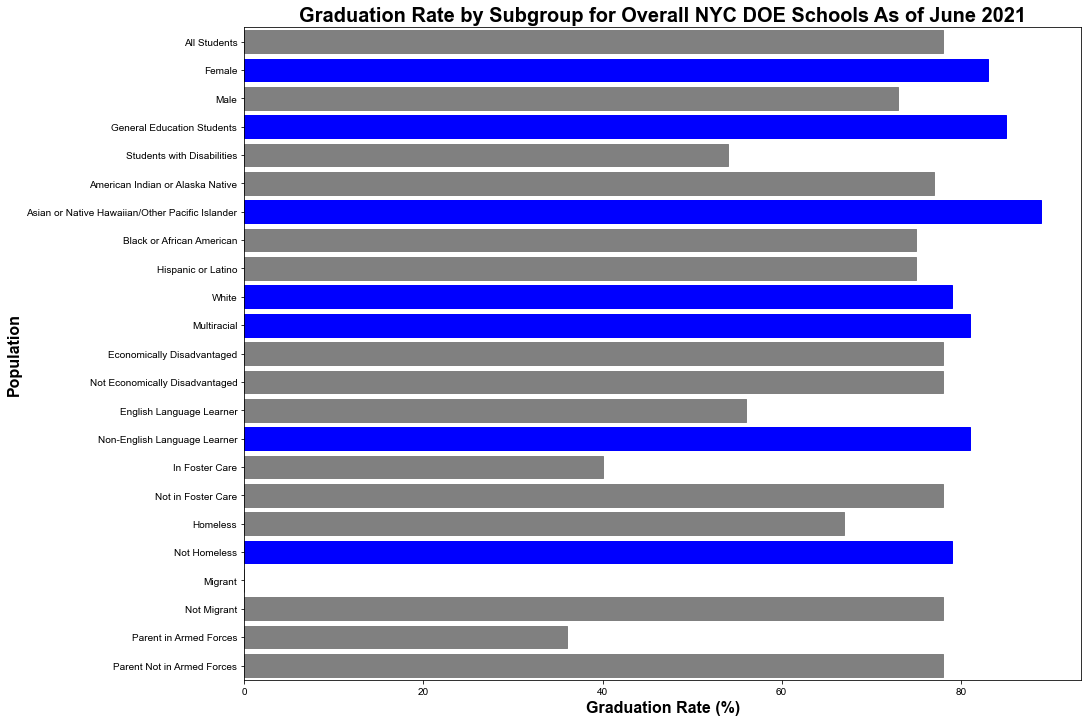

In [9]:
explore_df(overall_nyc, "Overall NYC DOE Schools", "city")

index
Subgroup
ALL_STUDENTS
GRAD_RATE
GRAD_PERCENTAGE
REGENTS_WITH_ADVANCED_DESIGNATION
REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE
REGENTS_DIPLOMA
REGENTS_DIPLOMA_PERCENTAGE
LOCAL_DIPLOMA
LOCAL_DIPLOMA_PERCENTAGE
NON_DIPLOMA_CRED
NON_DIPLOMA_CRED_PERCENTAGE
STILL_ENROLLED
STILL_ENROLLED_PERCENTAGE
GED_TRANSFER
GED_TRANSFER_PERCENTAGE
DROPOUT
DROPOUT_PERCENTAGE


Subgroup  ALL_STUDENTS  GRAD_RATE  \
1                                      All Students            95         93   
2                                            Female            68         67   
3                                              Male            27         26   
4                        General Education Students            68         66   
5                        Students with Disabilities            27         27   
6                  American Indian or Alaska Native             2          0   
7   Asian or Native Hawaiian/Other Pacific Islander             8          8   
8                         Black or African American            26         26   
9                                Hispanic or Latino            42         41   
10                                            White            10         10   
11                                      Multiracial             7          0   
12                       Economically Disadvantaged            63         61   
13                   Not Economically Disadvantaged            32         32   
14                         English Language Learner             3          0   
15                     Non-English Language Learner            92          0   
16                                   In Foster Care             0          0   
17                               Not in Foster Care            95         93   
18                                         Homeless             2          0   
19                                     Not Homeless            93          0   
20                                          Migrant             0          0   
21                                      Not Migrant            95         93   
22                           Parent in Armed Forces             0          0   
23                       Parent Not in Armed Forces            95         93   

    GRAD_PERCENTAGE  REGENTS_WITH_ADVANCED_DESIGNATION  \
1                98                                  0   
2                99                                  0   
3                96                                  0   
4                97                                  0   
5               100                                  0   
6                 0                                  0   
7               100                                  0   
8               100                                  0   
9                98                                  0   
10              100                                  0   
11                0                                  0   
12               97                                  0   
13              100                                  0   
14                0                                  0   
15                0                                  0   
16                0                                  0   
17               98                                  0   
18                0                                  0   
19                0                                  0   
20                0                                  0   
21               98                                  0   
22                0                                  0   
23               98                                  0   

    REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE  REGENTS_DIPLOMA  \
1                                              0               93   
2                                              0               67   
3                                              0               26   
4                                              0               66   
5                                              0               27   
6                                              0                0   
7                                              0                8   
8                                              0               26   
9                                              0               41   
10                                     

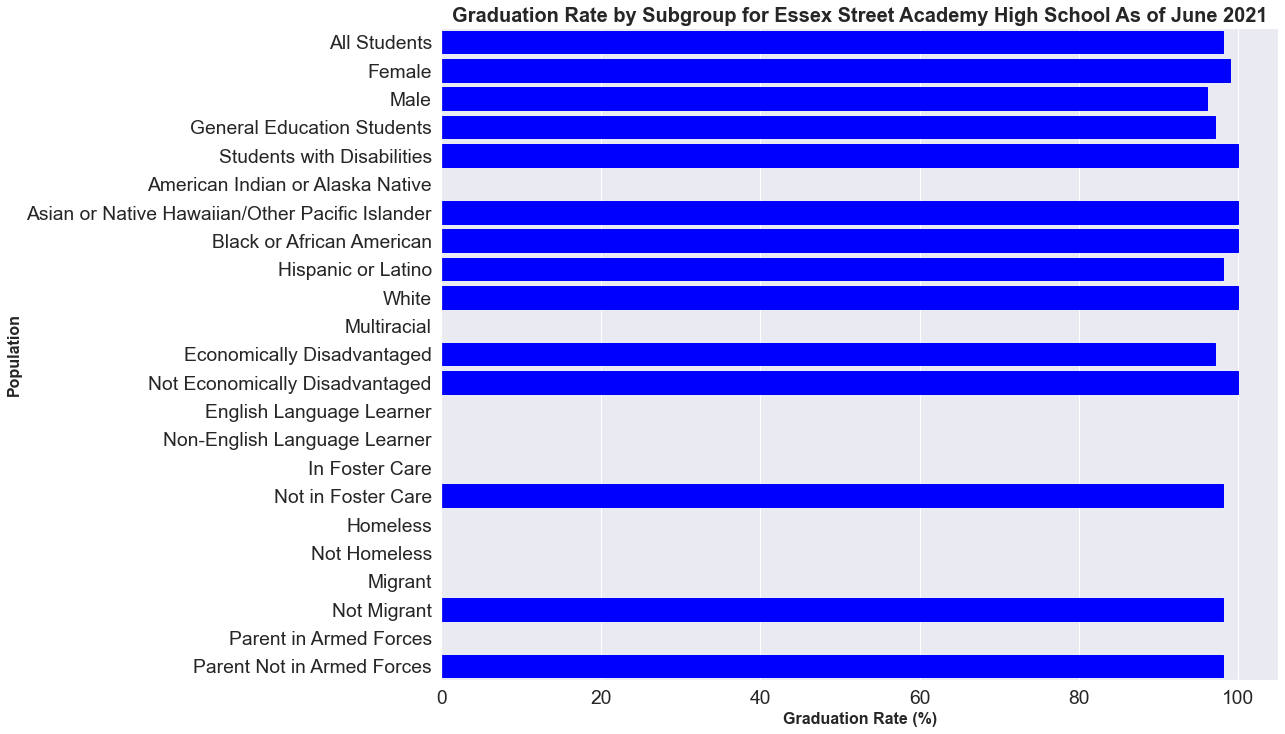

In [10]:
explore_df(essex, "Essex Street Academy High School", "city")

index
Subgroup
ALL_STUDENTS
GRAD_RATE
GRAD_PERCENTAGE
REGENTS_WITH_ADVANCED_DESIGNATION
REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE
REGENTS_DIPLOMA
REGENTS_DIPLOMA_PERCENTAGE
LOCAL_DIPLOMA
LOCAL_DIPLOMA_PERCENTAGE
NON_DIPLOMA_CRED
NON_DIPLOMA_CRED_PERCENTAGE
STILL_ENROLLED
STILL_ENROLLED_PERCENTAGE
GED_TRANSFER
GED_TRANSFER_PERCENTAGE
DROPOUT
DROPOUT_PERCENTAGE


Subgroup  ALL_STUDENTS  GRAD_RATE  \
1                                      All Students           382        368   
2                                            Female           234        222   
3                                              Male           148        146   
4                        General Education Students           351        338   
5                        Students with Disabilities            31         30   
6                  American Indian or Alaska Native             7          6   
7   Asian or Native Hawaiian/Other Pacific Islander            34         33   
8                         Black or African American            57         56   
9                                Hispanic or Latino            81         77   
10                                            White           155        152   
11                                      Multiracial            48         44   
12                       Economically Disadvantaged           112        106   
13                   Not Economically Disadvantaged           270        262   
14                         English Language Learner             0          0   
15                     Non-English Language Learner           382        368   
16                                   In Foster Care             0          0   
17                               Not in Foster Care           382        368   
18                                         Homeless             3          0   
19                                     Not Homeless           379          0   
20                                          Migrant             0          0   
21                                      Not Migrant           382        368   
22                           Parent in Armed Forces             0          0   
23                       Parent Not in Armed Forces           382        368   

    GRAD_PERCENTAGE  REGENTS_WITH_ADVANCED_DESIGNATION  \
1                96                                  0   
2                95                                  0   
3                99                                  0   
4                96                                  0   
5                97                                  0   
6                86                                  0   
7                97                                  0   
8                98                                  0   
9                95                                  0   
10               98                                  0   
11               92                                  0   
12               95                                  0   
13               97                                  0   
14                0                                  0   
15               96                                  0   
16                0                                  0   
17               96                                  0   
18                0                                  0   
19                0                                  0   
20                0                                  0   
21               96                                  0   
22                0                                  0   
23               96                                  0   

    REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE  REGENTS_DIPLOMA  \
1                                              0              368   
2                                              0              222   
3                                              0              146   
4                                              0              338   
5                                              0               30   
6                                              0                6   
7                                              0               33   
8                                              0               56   
9                                              0               77   
10                                     

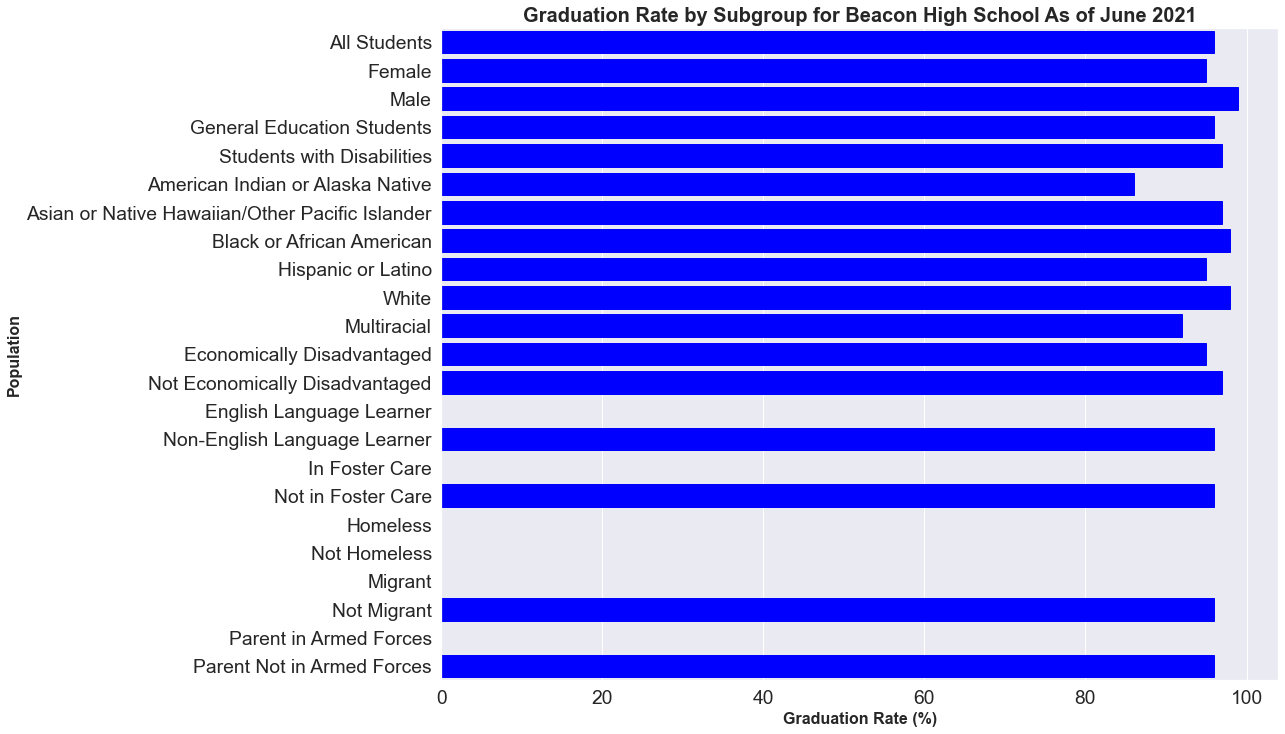

In [11]:
explore_df(beacon, "Beacon High School", "city")

index
Subgroup
ALL_STUDENTS
GRAD_RATE
GRAD_PERCENTAGE
REGENTS_WITH_ADVANCED_DESIGNATION
REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE
REGENTS_DIPLOMA
REGENTS_DIPLOMA_PERCENTAGE
LOCAL_DIPLOMA
LOCAL_DIPLOMA_PERCENTAGE
NON_DIPLOMA_CRED
NON_DIPLOMA_CRED_PERCENTAGE
STILL_ENROLLED
STILL_ENROLLED_PERCENTAGE
GED_TRANSFER
GED_TRANSFER_PERCENTAGE
DROPOUT
DROPOUT_PERCENTAGE


Subgroup  ALL_STUDENTS  GRAD_RATE  \
1                                      All Students            66         54   
2                                            Female            22         19   
3                                              Male            44         35   
4                        General Education Students            50         46   
5                        Students with Disabilities            16          8   
6                  American Indian or Alaska Native             0          0   
7   Asian or Native Hawaiian/Other Pacific Islander             0          0   
8                         Black or African American            23          0   
9                                Hispanic or Latino            40         29   
10                                            White             3          0   
11                                      Multiracial             0          0   
12                       Economically Disadvantaged            54         43   
13                   Not Economically Disadvantaged            12         11   
14                         English Language Learner             6          3   
15                     Non-English Language Learner            60         51   
16                                   In Foster Care             0          0   
17                               Not in Foster Care            66         54   
18                                         Homeless            11          9   
19                                     Not Homeless            55         45   
20                                          Migrant             0          0   
21                                      Not Migrant            66         54   
22                           Parent in Armed Forces             0          0   
23                       Parent Not in Armed Forces            66         54   

    GRAD_PERCENTAGE  REGENTS_WITH_ADVANCED_DESIGNATION  \
1                82                                  0   
2                86                                  0   
3                80                                  0   
4                92                                  0   
5                50                                  0   
6                 0                                  0   
7                 0                                  0   
8                 0                                  0   
9                73                                  0   
10                0                                  0   
11                0                                  0   
12               80                                  0   
13               92                                  0   
14               50                                  0   
15               85                                  0   
16                0                                  0   
17               82                                  0   
18               82                                  0   
19               82                                  0   
20                0                                  0   
21               82                                  0   
22                0                                  0   
23               82                                  0   

    REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE  REGENTS_DIPLOMA  \
1                                              0               54   
2                                              0               19   
3                                              0               35   
4                                              0               46   
5                                              0                8   
6                                              0                0   
7                                              0                0   
8                                              0                0   
9                                              0               29   
10                                     

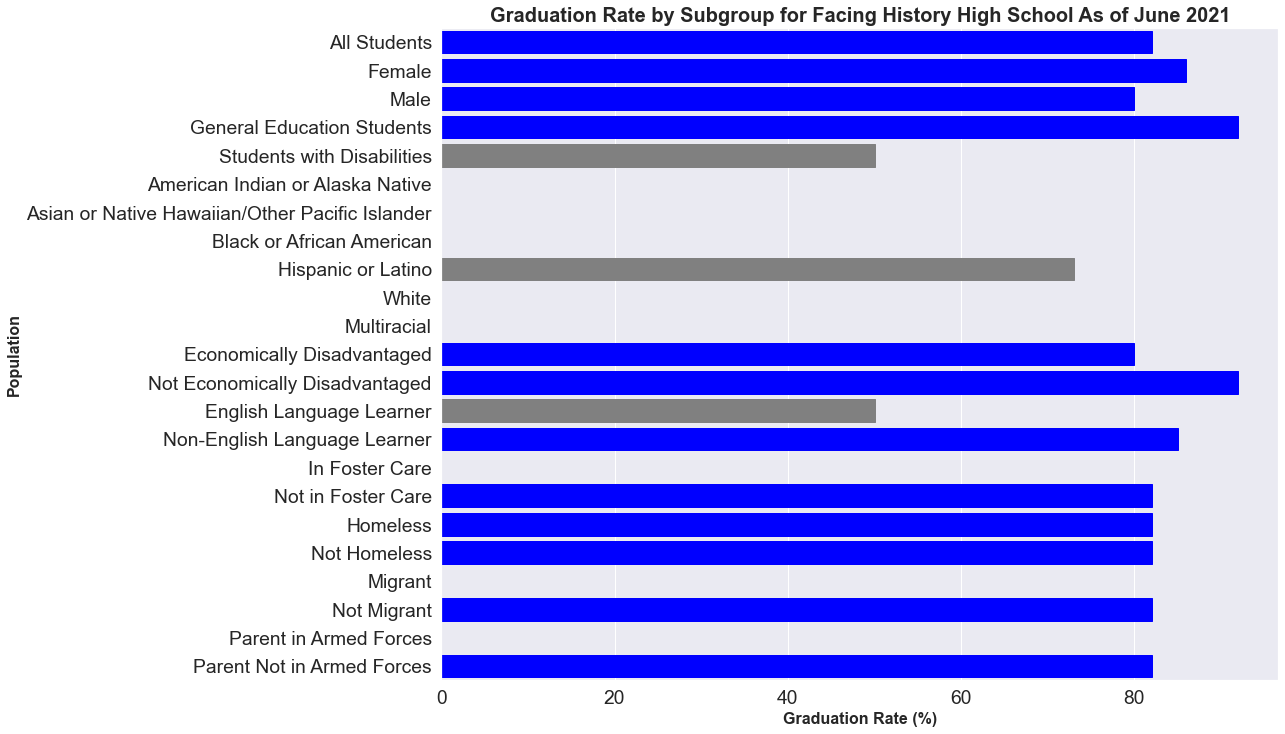

In [12]:
explore_df(facing_history, "Facing History High School", "city")

index
Subgroup
ALL_STUDENTS
GRAD_RATE
GRAD_PERCENTAGE
REGENTS_WITH_ADVANCED_DESIGNATION
REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE
REGENTS_DIPLOMA
REGENTS_DIPLOMA_PERCENTAGE
LOCAL_DIPLOMA
LOCAL_DIPLOMA_PERCENTAGE
NON_DIPLOMA_CRED
NON_DIPLOMA_CRED_PERCENTAGE
STILL_ENROLLED
STILL_ENROLLED_PERCENTAGE
GED_TRANSFER
GED_TRANSFER_PERCENTAGE
DROPOUT
DROPOUT_PERCENTAGE


Subgroup  ALL_STUDENTS  GRAD_RATE  \
1                                      All Students           108         96   
2                                            Female            57         49   
3                                              Male            51         47   
4                        General Education Students            80         72   
5                        Students with Disabilities            28         24   
6                  American Indian or Alaska Native             0          0   
7   Asian or Native Hawaiian/Other Pacific Islander             4          0   
8                         Black or African American            21         16   
9                                Hispanic or Latino            51         46   
10                                            White            28         26   
11                                      Multiracial             4          0   
12                       Economically Disadvantaged            64         59   
13                   Not Economically Disadvantaged            44         37   
14                         English Language Learner             4          0   
15                     Non-English Language Learner           104          0   
16                                   In Foster Care             0          0   
17                               Not in Foster Care           108         96   
18                                         Homeless             7          6   
19                                     Not Homeless           101         90   
20                                          Migrant             0          0   
21                                      Not Migrant           108         96   
22                           Parent in Armed Forces             0          0   
23                       Parent Not in Armed Forces           108         96   

    GRAD_PERCENTAGE  REGENTS_WITH_ADVANCED_DESIGNATION  \
1                89                                  0   
2                86                                  0   
3                92                                  0   
4                90                                  0   
5                86                                  0   
6                 0                                  0   
7                 0                                  0   
8                76                                  0   
9                90                                  0   
10               93                                  0   
11                0                                  0   
12               92                                  0   
13               84                                  0   
14                0                                  0   
15                0                                  0   
16                0                                  0   
17               89                                  0   
18               86                                  0   
19               89                                  0   
20                0                                  0   
21               89                                  0   
22                0                                  0   
23               89                                  0   

    REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE  REGENTS_DIPLOMA  \
1                                              0               96   
2                                              0               49   
3                                              0               47   
4                                              0               72   
5                                              0               24   
6                                              0                0   
7                                              0                0   
8                                              0               16   
9                                              0               46   
10                                     

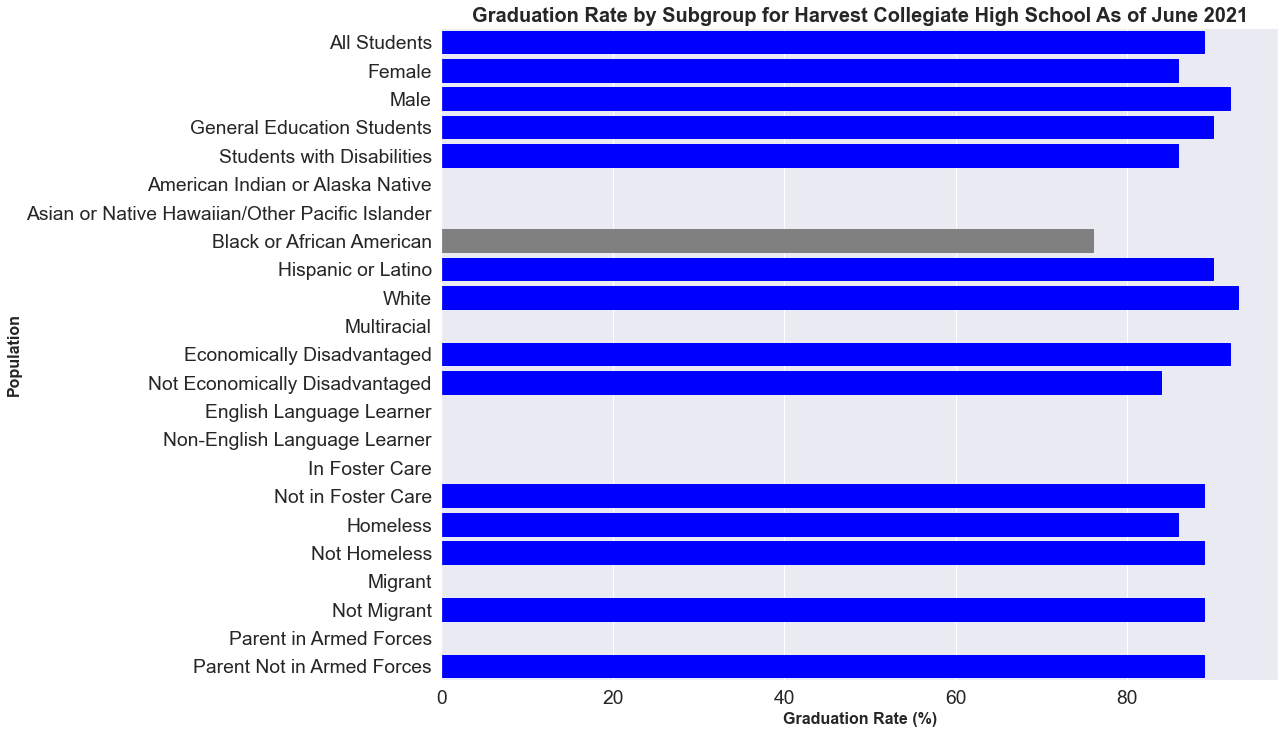

In [13]:
explore_df(harvest, "Harvest Collegiate High School", "city")

index
Subgroup
ALL_STUDENTS
GRAD_RATE
GRAD_PERCENTAGE
REGENTS_WITH_ADVANCED_DESIGNATION
REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE
REGENTS_DIPLOMA
REGENTS_DIPLOMA_PERCENTAGE
LOCAL_DIPLOMA
LOCAL_DIPLOMA_PERCENTAGE
NON_DIPLOMA_CRED
NON_DIPLOMA_CRED_PERCENTAGE
STILL_ENROLLED
STILL_ENROLLED_PERCENTAGE
GED_TRANSFER
GED_TRANSFER_PERCENTAGE
DROPOUT
DROPOUT_PERCENTAGE


Subgroup  ALL_STUDENTS  GRAD_RATE  \
1                                      All Students            69         64   
2                                            Female            46         43   
3                                              Male            23         21   
4                        General Education Students            56         52   
5                        Students with Disabilities            13         12   
6                  American Indian or Alaska Native             2          0   
7   Asian or Native Hawaiian/Other Pacific Islander             6          4   
8                         Black or African American            14         13   
9                                Hispanic or Latino            39         37   
10                                            White             5          5   
11                                      Multiracial             3          0   
12                       Economically Disadvantaged            60         56   
13                   Not Economically Disadvantaged             9          8   
14                         English Language Learner             0          0   
15                     Non-English Language Learner            69         64   
16                                   In Foster Care             1          0   
17                               Not in Foster Care            68          0   
18                                         Homeless            17         15   
19                                     Not Homeless            52         49   
20                                          Migrant             0          0   
21                                      Not Migrant            69         64   
22                           Parent in Armed Forces             0          0   
23                       Parent Not in Armed Forces            69         64   

    GRAD_PERCENTAGE  REGENTS_WITH_ADVANCED_DESIGNATION  \
1                93                                  0   
2                93                                  0   
3                91                                  0   
4                93                                  0   
5                92                                  0   
6                 0                                  0   
7                67                                  0   
8                93                                  0   
9                95                                  0   
10              100                                  0   
11                0                                  0   
12               93                                  0   
13               89                                  0   
14                0                                  0   
15               93                                  0   
16                0                                  0   
17                0                                  0   
18               88                                  0   
19               94                                  0   
20                0                                  0   
21               93                                  0   
22                0                                  0   
23               93                                  0   

    REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE  REGENTS_DIPLOMA  \
1                                              0               64   
2                                              0               43   
3                                              0               21   
4                                              0               52   
5                                              0               12   
6                                              0                0   
7                                              0                4   
8                                              0               13   
9                                              0               37   
10                                     

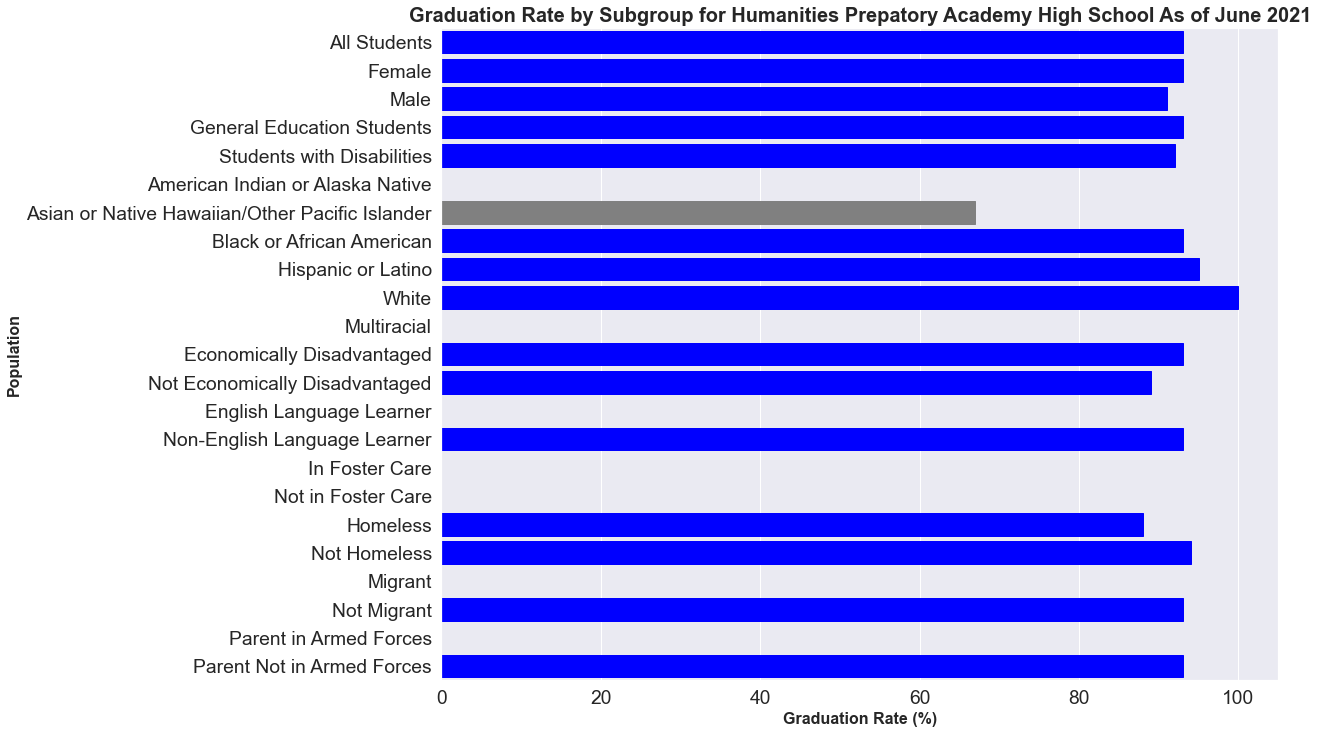

In [14]:
explore_df(humanities_prep, "Humanities Prepatory Academy High School", "city")

index
Subgroup
ALL_STUDENTS
GRAD_RATE
GRAD_PERCENTAGE
REGENTS_WITH_ADVANCED_DESIGNATION
REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE
REGENTS_DIPLOMA
REGENTS_DIPLOMA_PERCENTAGE
LOCAL_DIPLOMA
LOCAL_DIPLOMA_PERCENTAGE
NON_DIPLOMA_CRED
NON_DIPLOMA_CRED_PERCENTAGE
STILL_ENROLLED
STILL_ENROLLED_PERCENTAGE
GED_TRANSFER
GED_TRANSFER_PERCENTAGE
DROPOUT
DROPOUT_PERCENTAGE


Subgroup  ALL_STUDENTS  GRAD_RATE  \
1                                      All Students            71         68   
2                                            Female            35         35   
3                                              Male            36         33   
4                        General Education Students            57         55   
5                        Students with Disabilities            14         13   
6                  American Indian or Alaska Native             0          0   
7   Asian or Native Hawaiian/Other Pacific Islander             2          0   
8                         Black or African American            12          0   
9                                Hispanic or Latino            18         17   
10                                            White            37         36   
11                                      Multiracial             2          0   
12                       Economically Disadvantaged            21         20   
13                   Not Economically Disadvantaged            50         48   
14                         English Language Learner             0          0   
15                     Non-English Language Learner            71         68   
16                                   In Foster Care             1          0   
17                               Not in Foster Care            70          0   
18                                         Homeless             3          0   
19                                     Not Homeless            68          0   
20                                          Migrant             0          0   
21                                      Not Migrant            71         68   
22                           Parent in Armed Forces             0          0   
23                       Parent Not in Armed Forces            71         68   

    GRAD_PERCENTAGE  REGENTS_WITH_ADVANCED_DESIGNATION  \
1                96                                  0   
2               100                                  0   
3                92                                  0   
4                96                                  0   
5                93                                  0   
6                 0                                  0   
7                 0                                  0   
8                 0                                  0   
9                94                                  0   
10               97                                  0   
11                0                                  0   
12               95                                  0   
13               96                                  0   
14                0                                  0   
15               96                                  0   
16                0                                  0   
17                0                                  0   
18                0                                  0   
19                0                                  0   
20                0                                  0   
21               96                                  0   
22                0                                  0   
23               96                                  0   

    REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE  REGENTS_DIPLOMA  \
1                                              0               68   
2                                              0               35   
3                                              0               33   
4                                              0               55   
5                                              0               13   
6                                              0                0   
7                                              0                0   
8                                              0                0   
9                                              0               17   
10                                     

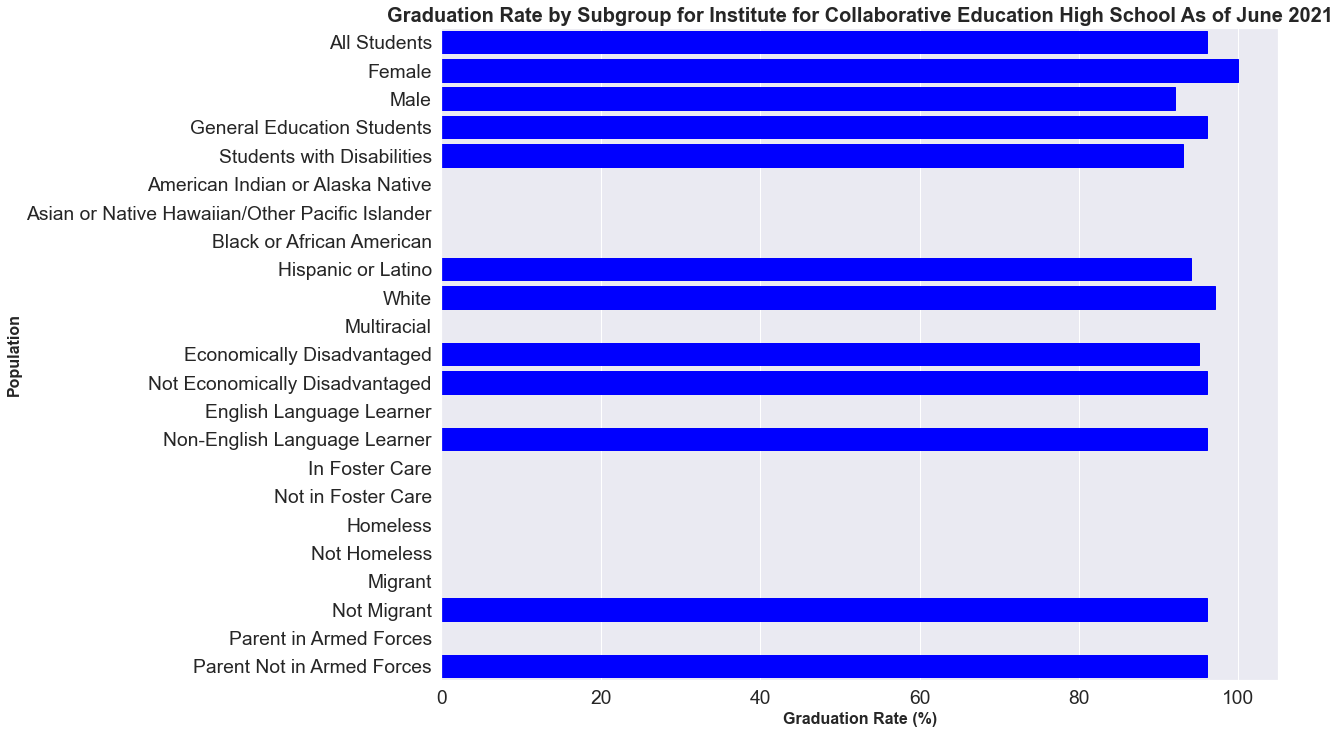

In [15]:
explore_df(ice, "Institute for Collaborative Education High School", "city")

index
Subgroup
ALL_STUDENTS
GRAD_RATE
GRAD_PERCENTAGE
REGENTS_WITH_ADVANCED_DESIGNATION
REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE
REGENTS_DIPLOMA
REGENTS_DIPLOMA_PERCENTAGE
LOCAL_DIPLOMA
LOCAL_DIPLOMA_PERCENTAGE
NON_DIPLOMA_CRED
NON_DIPLOMA_CRED_PERCENTAGE
STILL_ENROLLED
STILL_ENROLLED_PERCENTAGE
GED_TRANSFER
GED_TRANSFER_PERCENTAGE
DROPOUT
DROPOUT_PERCENTAGE


Subgroup  ALL_STUDENTS  GRAD_RATE  \
1                                      All Students            73         59   
2                                            Female            42         33   
3                                              Male            31         26   
4                        General Education Students            54         46   
5                        Students with Disabilities            19         13   
6                  American Indian or Alaska Native             1          0   
7   Asian or Native Hawaiian/Other Pacific Islander             4          0   
8                         Black or African American            21         17   
9                                Hispanic or Latino            45         35   
10                                            White             2          0   
11                                      Multiracial             0          0   
12                       Economically Disadvantaged            65         52   
13                   Not Economically Disadvantaged             8          7   
14                         English Language Learner             3          0   
15                     Non-English Language Learner            70          0   
16                                   In Foster Care             2          0   
17                               Not in Foster Care            71          0   
18                                         Homeless             2          0   
19                                     Not Homeless            71          0   
20                                          Migrant             0          0   
21                                      Not Migrant            73         59   
22                           Parent in Armed Forces             0          0   
23                       Parent Not in Armed Forces            73         59   

    GRAD_PERCENTAGE  REGENTS_WITH_ADVANCED_DESIGNATION  \
1                81                                  0   
2                79                                  0   
3                84                                  0   
4                85                                  0   
5                68                                  0   
6                 0                                  0   
7                 0                                  0   
8                81                                  0   
9                78                                  0   
10                0                                  0   
11                0                                  0   
12               80                                  0   
13               88                                  0   
14                0                                  0   
15                0                                  0   
16                0                                  0   
17                0                                  0   
18                0                                  0   
19                0                                  0   
20                0                                  0   
21               81                                  0   
22                0                                  0   
23               81                                  0   

    REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE  REGENTS_DIPLOMA  \
1                                              0               59   
2                                              0               33   
3                                              0               26   
4                                              0               46   
5                                              0               13   
6                                              0                0   
7                                              0                0   
8                                              0               17   
9                                              0               35   
10                                     

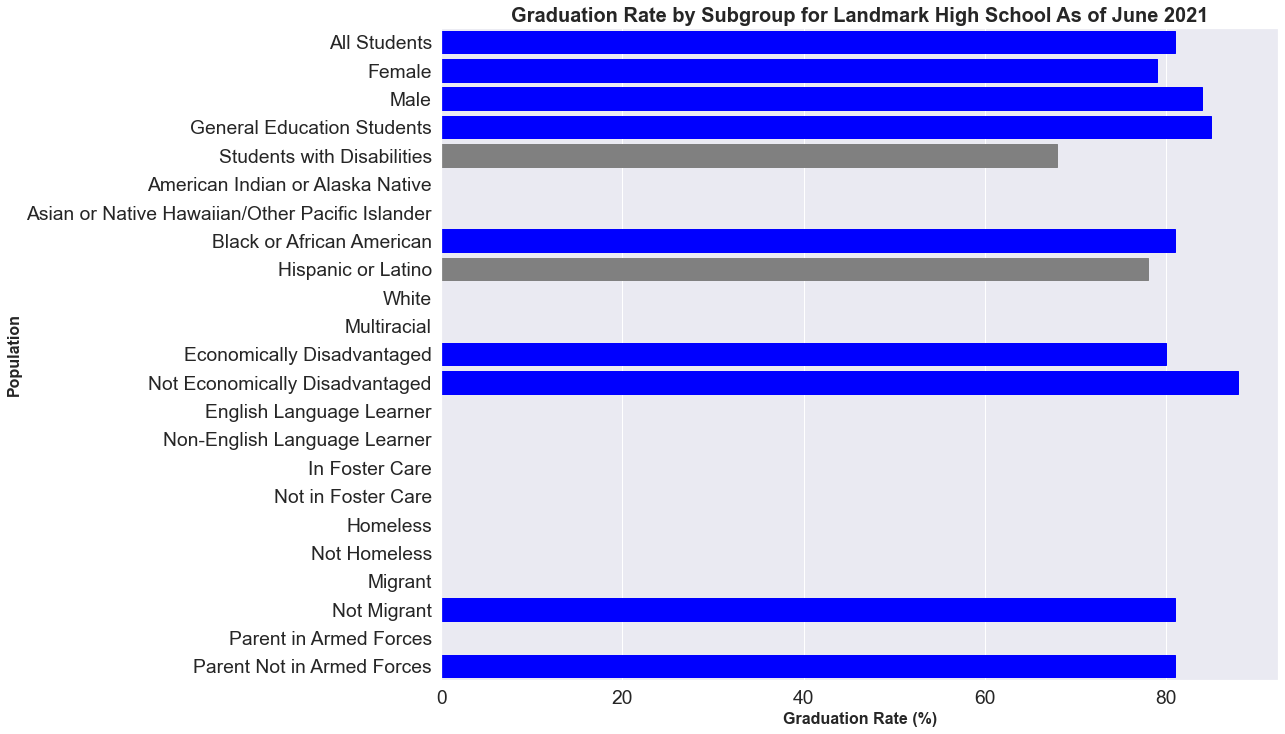

In [16]:
explore_df(landmark, "Landmark High School", "city")

index
Subgroup
ALL_STUDENTS
GRAD_RATE
GRAD_PERCENTAGE
REGENTS_WITH_ADVANCED_DESIGNATION
REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE
REGENTS_DIPLOMA
REGENTS_DIPLOMA_PERCENTAGE
LOCAL_DIPLOMA
LOCAL_DIPLOMA_PERCENTAGE
NON_DIPLOMA_CRED
NON_DIPLOMA_CRED_PERCENTAGE
STILL_ENROLLED
STILL_ENROLLED_PERCENTAGE
GED_TRANSFER
GED_TRANSFER_PERCENTAGE
DROPOUT
DROPOUT_PERCENTAGE


Subgroup  ALL_STUDENTS  GRAD_RATE  \
1                                      All Students            72         49   
2                                            Female            31         23   
3                                              Male            41         26   
4                        General Education Students            71          0   
5                        Students with Disabilities             1          0   
6                  American Indian or Alaska Native             0          0   
7   Asian or Native Hawaiian/Other Pacific Islander            14         12   
8                         Black or African American             9          0   
9                                Hispanic or Latino            39         24   
10                                            White             9          6   
11                                      Multiracial             1          0   
12                       Economically Disadvantaged            56         37   
13                   Not Economically Disadvantaged            16         12   
14                         English Language Learner            39         21   
15                     Non-English Language Learner            33         28   
16                                   In Foster Care             0          0   
17                               Not in Foster Care            72         49   
18                                         Homeless            14          9   
19                                     Not Homeless            58         40   
20                                          Migrant             0          0   
21                                      Not Migrant            72         49   
22                           Parent in Armed Forces             0          0   
23                       Parent Not in Armed Forces            72         49   

    GRAD_PERCENTAGE  REGENTS_WITH_ADVANCED_DESIGNATION  \
1                68                                  0   
2                74                                  0   
3                63                                  0   
4                 0                                  0   
5                 0                                  0   
6                 0                                  0   
7                86                                  0   
8                 0                                  0   
9                62                                  0   
10               67                                  0   
11                0                                  0   
12               66                                  0   
13               75                                  0   
14               54                                  0   
15               85                                  0   
16                0                                  0   
17               68                                  0   
18               64                                  0   
19               69                                  0   
20                0                                  0   
21               68                                  0   
22                0                                  0   
23               68                                  0   

    REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE  REGENTS_DIPLOMA  \
1                                              0               49   
2                                              0               23   
3                                              0               26   
4                                              0                0   
5                                              0                0   
6                                              0                0   
7                                              0               12   
8                                              0                0   
9                                              0               24   
10                                     

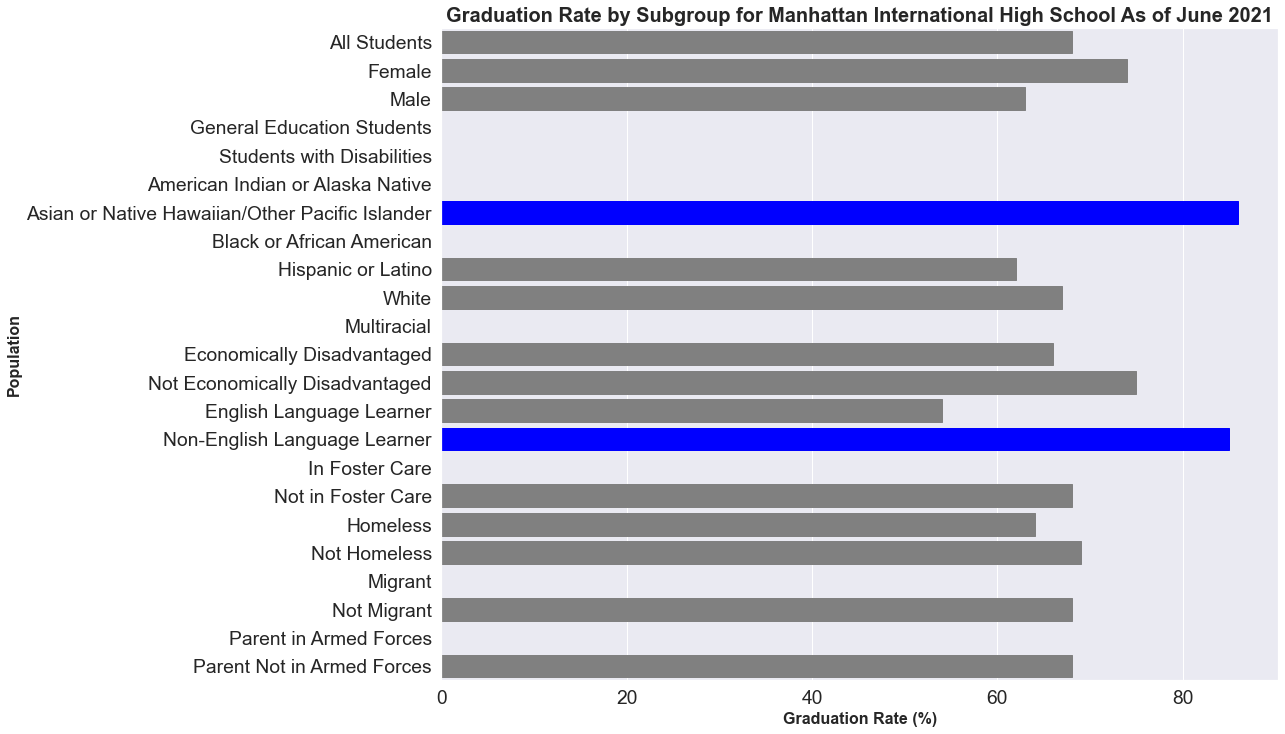

In [17]:
explore_df(mihs, "Manhattan International High School", "city")

index
Subgroup
ALL_STUDENTS
GRAD_RATE
GRAD_PERCENTAGE
REGENTS_WITH_ADVANCED_DESIGNATION
REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE
REGENTS_DIPLOMA
REGENTS_DIPLOMA_PERCENTAGE
LOCAL_DIPLOMA
LOCAL_DIPLOMA_PERCENTAGE
NON_DIPLOMA_CRED
NON_DIPLOMA_CRED_PERCENTAGE
STILL_ENROLLED
STILL_ENROLLED_PERCENTAGE
GED_TRANSFER
GED_TRANSFER_PERCENTAGE
DROPOUT
DROPOUT_PERCENTAGE


Subgroup  ALL_STUDENTS  GRAD_RATE  \
1                                      All Students           101         97   
2                                            Female            47         46   
3                                              Male            54         51   
4                        General Education Students            81         78   
5                        Students with Disabilities            20         19   
6                  American Indian or Alaska Native             0          0   
7   Asian or Native Hawaiian/Other Pacific Islander            20         19   
8                         Black or African American            10         10   
9                                Hispanic or Latino            30         27   
10                                            White            33         33   
11                                      Multiracial             8          8   
12                       Economically Disadvantaged            45         43   
13                   Not Economically Disadvantaged            56         54   
14                         English Language Learner             0          0   
15                     Non-English Language Learner           101         97   
16                                   In Foster Care             0          0   
17                               Not in Foster Care           101         97   
18                                         Homeless             1          0   
19                                     Not Homeless           100          0   
20                                          Migrant             0          0   
21                                      Not Migrant           101         97   
22                           Parent in Armed Forces             0          0   
23                       Parent Not in Armed Forces           101         97   

    GRAD_PERCENTAGE  REGENTS_WITH_ADVANCED_DESIGNATION  \
1                96                                  0   
2                98                                  0   
3                94                                  0   
4                96                                  0   
5                95                                  0   
6                 0                                  0   
7                95                                  0   
8               100                                  0   
9                90                                  0   
10              100                                  0   
11              100                                  0   
12               96                                  0   
13               96                                  0   
14                0                                  0   
15               96                                  0   
16                0                                  0   
17               96                                  0   
18                0                                  0   
19                0                                  0   
20                0                                  0   
21               96                                  0   
22                0                                  0   
23               96                                  0   

    REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE  REGENTS_DIPLOMA  \
1                                              0               97   
2                                              0               46   
3                                              0               51   
4                                              0               78   
5                                              0               19   
6                                              0                0   
7                                              0               19   
8                                              0               10   
9                                              0               27   
10                                     

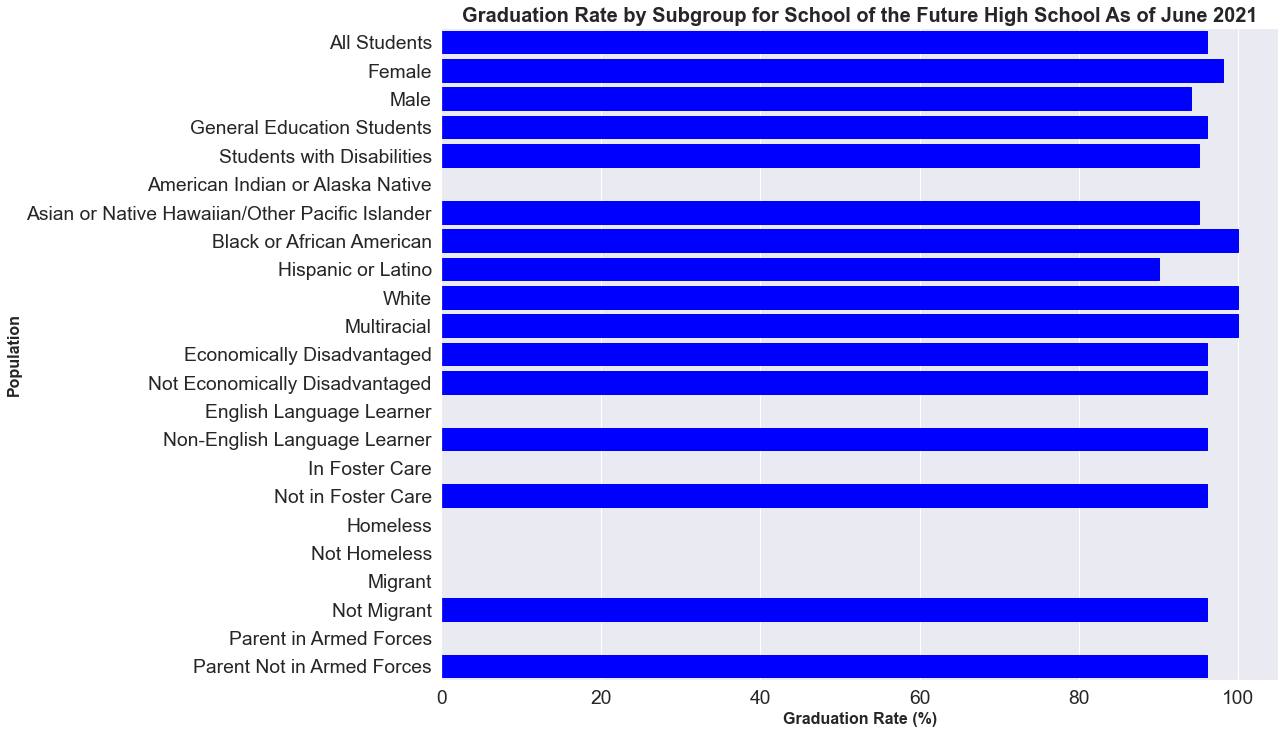

In [18]:
explore_df(sof, "School of the Future High School", "city")

index
Subgroup
ALL_STUDENTS
GRAD_RATE
GRAD_PERCENTAGE
REGENTS_WITH_ADVANCED_DESIGNATION
REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE
REGENTS_DIPLOMA
REGENTS_DIPLOMA_PERCENTAGE
LOCAL_DIPLOMA
LOCAL_DIPLOMA_PERCENTAGE
NON_DIPLOMA_CRED
NON_DIPLOMA_CRED_PERCENTAGE
STILL_ENROLLED
STILL_ENROLLED_PERCENTAGE
GED_TRANSFER
GED_TRANSFER_PERCENTAGE
DROPOUT
DROPOUT_PERCENTAGE


Subgroup  ALL_STUDENTS  GRAD_RATE  \
1                                      All Students           102         64   
2                                            Female            52         37   
3                                              Male            50         27   
4                        General Education Students            77         51   
5                        Students with Disabilities            25         13   
6                  American Indian or Alaska Native             1          0   
7   Asian or Native Hawaiian/Other Pacific Islander             5          3   
8                         Black or African American            30         22   
9                                Hispanic or Latino            60         34   
10                                            White             4          0   
11                                      Multiracial             2          0   
12                       Economically Disadvantaged            72         39   
13                   Not Economically Disadvantaged            30         25   
14                         English Language Learner             3          0   
15                     Non-English Language Learner            99          0   
16                                   In Foster Care             0          0   
17                               Not in Foster Care           102         64   
18                                         Homeless             5          2   
19                                     Not Homeless            97         62   
20                                          Migrant             0          0   
21                                      Not Migrant           102         64   
22                           Parent in Armed Forces             0          0   
23                       Parent Not in Armed Forces           102         64   

    GRAD_PERCENTAGE  REGENTS_WITH_ADVANCED_DESIGNATION  \
1                63                                  0   
2                71                                  0   
3                54                                  0   
4                66                                  0   
5                52                                  0   
6                 0                                  0   
7                60                                  0   
8                73                                  0   
9                57                                  0   
10                0                                  0   
11                0                                  0   
12               54                                  0   
13               83                                  0   
14                0                                  0   
15                0                                  0   
16                0                                  0   
17               63                                  0   
18               40                                  0   
19               64                                  0   
20                0                                  0   
21               63                                  0   
22                0                                  0   
23               63                                  0   

    REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE  REGENTS_DIPLOMA  \
1                                              0               64   
2                                              0               37   
3                                              0               27   
4                                              0               51   
5                                              0               13   
6                                              0                0   
7                                              0                3   
8                                              0               22   
9                                              0               34   
10                                     

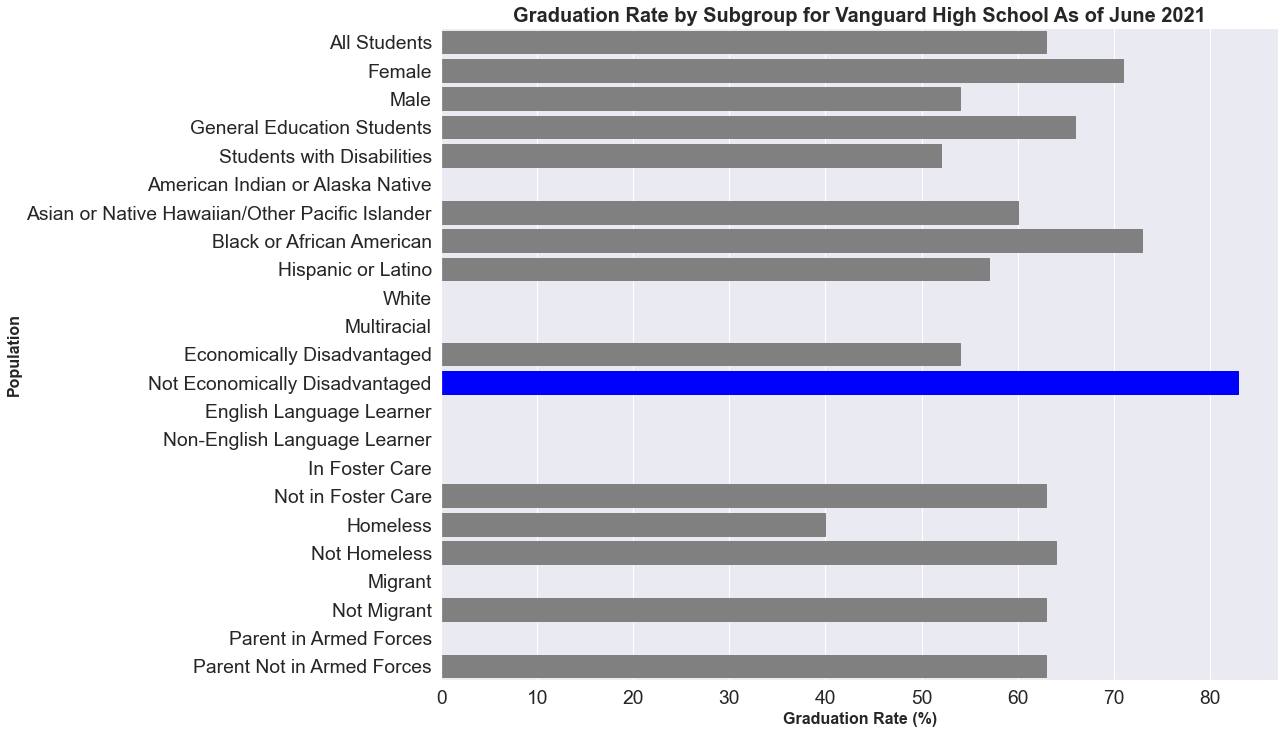

In [19]:
explore_df(vhs, "Vanguard High School", "city")

In [20]:
import ipywidgets as widgets

In [21]:
widgets.IntSlider(
    min=2016,
    max=2021,
    step=1,
    description='Year:',
    value=2017
)

IntSlider(value=2017, description='Year:', max=2021, min=2016)

In [22]:
from IPython.display import display

In [23]:
slider = widgets.IntSlider(
    min=2016,
    max=2021,
    step=1,
    description='Year:',
    value=2017
)
display(slider)

IntSlider(value=2017, description='Year:', max=2021, min=2016)

In [24]:
slider = widgets.IntSlider(
    min=2016,
    max=2021,
    step=1,
    description='Year:',
    value=2017
)
text = widgets.IntText()
display(slider, text)
widgets.jslink((slider, 'value'), (text, 'value'))

IntSlider(value=2017, description='Year:', max=2021, min=2016)

IntText(value=0)

Link(source=(IntSlider(value=2017, description='Year:', max=2021, min=2016), 'value'), target=(IntText(value=0…

In [25]:
btn = widgets.Button(description='NYSED')
display(btn)
def btn_eventhandler(obj):
    print('Hello from the {} button!'.format(obj.description))
btn.on_click(btn_eventhandler)

Button(description='NYSED', style=ButtonStyle())

In [26]:
checkbox = widgets.Checkbox(
           description='Check to invert',)

In [27]:
display(checkbox)

Checkbox(value=False, description='Check to invert')

In [28]:
sof_subset = sof.loc[1:,["Subgroup", "ALL_STUDENTS", "GRAD_PERCENTAGE", "REGENTS_DIPLOMA_PERCENTAGE",
                            "DROPOUT_PERCENTAGE"]]
sof_subset.head()

#new_df = df.loc[:, ["director","column1", "column2",  "column3",..., "columnn"]]

Subgroup ALL_STUDENTS GRAD_PERCENTAGE  \
1                All Students          101             96%   
2                      Female           47             98%   
3                        Male           54             94%   
4  General Education Students           81             96%   
5  Students with Disabilities           20             95%   

  REGENTS_DIPLOMA_PERCENTAGE DROPOUT_PERCENTAGE  
1                        96%                 0%  
2                        98%                 0%  
3                        94%                 0%  
4                        96%                 0%  
5                        95%                 0%

In [29]:
overall_nyc_subset = overall_nyc.loc[1:,["Subgroup", "ALL_STUDENTS", "GRAD_PERCENTAGE", "REGENTS_DIPLOMA_PERCENTAGE",
                            "DROPOUT_PERCENTAGE"]]
overall_nyc_subset.head(23)

Subgroup ALL_STUDENTS  \
1                                      All Students        80294   
2                                            Female        38739   
3                                              Male        41555   
4                        General Education Students        62760   
5                        Students with Disabilities        17534   
6                  American Indian or Alaska Native          913   
7   Asian or Native Hawaiian/Other Pacific Islander        13154   
8                         Black or African American        20655   
9                                Hispanic or Latino        31662   
10                                            White        12486   
11                                      Multiracial         1424   
12                       Economically Disadvantaged        57636   
13                   Not Economically Disadvantaged        22658   
14                         English Language Learner         8538   
15                     Non-English Language Learner        71756   
16                                   In Foster Care          433   
17                               Not in Foster Care        79861   
18                                         Homeless         5788   
19                                     Not Homeless        74506   
20                                          Migrant            0   
21                                      Not Migrant        80294   
22                           Parent in Armed Forces           11   
23                       Parent Not in Armed Forces        80283   

   GRAD_PERCENTAGE REGENTS_DIPLOMA_PERCENTAGE DROPOUT_PERCENTAGE  
1              78%                        42%                 5%  
2              83%                        43%                 3%  
3              73%                        42%                 6%  
4              85%                        43%                 4%  
5              54%                        42%                 7%  
6              77%                        45%                 5%  
7              89%                        26%                 3%  
8              75%                        53%                 5%  
9              75%                        46%                 6%  
10             79%                        33%                 2%  
11             81%                        39%                 2%  
12             78%                        45%                 5%  
13             78%                        36%                 4%  
14             56%                        46%                16%  
15             81%                        42%                 3%  
16             40%                        34%                17%  
17             78%                        43%                 5%  
18             67%                        47%                12%  
19             79%                        42%                 4%  
20              0%                         0%                 0%  
21             78%                        42%                 5%  
22             36%                        18%                 0%  
23             78%                        42%                 5%

In [30]:
def remove_special_chars_df(df):
    for col in df.columns:
        print(col)
    df = df.replace({"\%":""}, regex = True)
    df = df.replace({"—": 0}, regex = True)
    df = df.astype({col: int for col in df.columns[1:]})
    return df


In [31]:
overall_nyc_subset = remove_special_chars_df(overall_nyc_subset);

Subgroup
ALL_STUDENTS
GRAD_PERCENTAGE
REGENTS_DIPLOMA_PERCENTAGE
DROPOUT_PERCENTAGE


In [32]:
overall_nyc_subset["Population"] = "CITYWIDE"

In [33]:
overall_nyc_subset

Subgroup  ALL_STUDENTS  \
1                                      All Students         80294   
2                                            Female         38739   
3                                              Male         41555   
4                        General Education Students         62760   
5                        Students with Disabilities         17534   
6                  American Indian or Alaska Native           913   
7   Asian or Native Hawaiian/Other Pacific Islander         13154   
8                         Black or African American         20655   
9                                Hispanic or Latino         31662   
10                                            White         12486   
11                                      Multiracial          1424   
12                       Economically Disadvantaged         57636   
13                   Not Economically Disadvantaged         22658   
14                         English Language Learner          8538   
15                     Non-English Language Learner         71756   
16                                   In Foster Care           433   
17                               Not in Foster Care         79861   
18                                         Homeless          5788   
19                                     Not Homeless         74506   
20                                          Migrant             0   
21                                      Not Migrant         80294   
22                           Parent in Armed Forces            11   
23                       Parent Not in Armed Forces         80283   

    GRAD_PERCENTAGE  REGENTS_DIPLOMA_PERCENTAGE  DROPOUT_PERCENTAGE Population  
1                78                          42                   5   CITYWIDE  
2                83                          43                   3   CITYWIDE  
3                73                          42                   6   CITYWIDE  
4                85                          43                   4   CITYWIDE  
5                54                          42                   7   CITYWIDE  
6                77                          45                   5   CITYWIDE  
7                89                          26                   3   CITYWIDE  
8                75                          53                   5   CITYWIDE  
9                75                          46                   6   CITYWIDE  
10               79                          33                   2   CITYWIDE  
11               81                          39                   2   CITYWIDE  
12               78                          45                   5   CITYWIDE  
13               78                          36                   4   CITYWIDE  
14               56                          46                  16   CITYWIDE  
15               81                          42                   3   CITYWIDE  
16               40                          34                  17   CITYWIDE  
17               78                          43                   5   CITYWIDE  
18               67                          47                  12   CITYWIDE  
19               79                          42                   4   CITYWIDE  
20                0                           0                   0   CITYWIDE  
21               78                          42                   5   CITYWIDE  
22               36                          18                   0   CITYWIDE  
23               78                          42                   5   CITYWIDE

In [34]:
sof_subset = remove_special_chars_df(sof_subset);

Subgroup
ALL_STUDENTS
GRAD_PERCENTAGE
REGENTS_DIPLOMA_PERCENTAGE
DROPOUT_PERCENTAGE


In [35]:
sof_subset["Population"] = "SOF"
sof_subset

Subgroup  ALL_STUDENTS  \
1                                      All Students           101   
2                                            Female            47   
3                                              Male            54   
4                        General Education Students            81   
5                        Students with Disabilities            20   
6                  American Indian or Alaska Native             0   
7   Asian or Native Hawaiian/Other Pacific Islander            20   
8                         Black or African American            10   
9                                Hispanic or Latino            30   
10                                            White            33   
11                                      Multiracial             8   
12                       Economically Disadvantaged            45   
13                   Not Economically Disadvantaged            56   
14                         English Language Learner             0   
15                     Non-English Language Learner           101   
16                                   In Foster Care             0   
17                               Not in Foster Care           101   
18                                         Homeless             1   
19                                     Not Homeless           100   
20                                          Migrant             0   
21                                      Not Migrant           101   
22                           Parent in Armed Forces             0   
23                       Parent Not in Armed Forces           101   

    GRAD_PERCENTAGE  REGENTS_DIPLOMA_PERCENTAGE  DROPOUT_PERCENTAGE Population  
1                96                          96                   0        SOF  
2                98                          98                   0        SOF  
3                94                          94                   0        SOF  
4                96                          96                   0        SOF  
5                95                          95                   0        SOF  
6                 0                           0                   0        SOF  
7                95                          95                   0        SOF  
8               100                         100                   0        SOF  
9                90                          90                   0        SOF  
10              100                         100                   0        SOF  
11              100                         100                   0        SOF  
12               96                          96                   0        SOF  
13               96                          96                   0        SOF  
14                0                           0                   0        SOF  
15               96                          96                   0        SOF  
16                0                           0                   0        SOF  
17               96                          96                   0        SOF  
18                0                           0                   0        SOF  
19                0                           0                   0        SOF  
20                0                           0                   0        SOF  
21               96                          96                   0        SOF  
22                0                           0                   0        SOF  
23               96                          96                   0        SOF

In [36]:
#grouped = df.groupby(['Population', 'Subgroup'])['GRAD_PERCENTAGE']
grouped_sof = sof_subset.groupby(['Population', "Subgroup"])['GRAD_PERCENTAGE'].max()

In [37]:
grouped_sof

Population  Subgroup                                       
SOF         All Students                                        96
            American Indian or Alaska Native                     0
            Asian or Native Hawaiian/Other Pacific Islander     95
            Black or African American                          100
            Economically Disadvantaged                          96
            English Language Learner                             0
            Female                                              98
            General Education Students                          96
            Hispanic or Latino                                  90
            Homeless                                             0
            In Foster Care                                       0
            Male                                                94
            Migrant                                              0
            Multiracial                                        100
  

In [38]:
grouped_nyc_overall = overall_nyc_subset.groupby(['Population', "Subgroup"])['GRAD_PERCENTAGE'].max()

In [39]:
grouped_nyc_overall

Population  Subgroup                                       
CITYWIDE    All Students                                       78
            American Indian or Alaska Native                   77
            Asian or Native Hawaiian/Other Pacific Islander    89
            Black or African American                          75
            Economically Disadvantaged                         78
            English Language Learner                           56
            Female                                             83
            General Education Students                         85
            Hispanic or Latino                                 75
            Homeless                                           67
            In Foster Care                                     40
            Male                                               73
            Migrant                                             0
            Multiracial                                        81
            Non-

In [40]:
#merged_df = pd.merge(left = df1, right = df2, left_on = ["primary_key"], 
#                          right_on = ["primary_key"], how = "inner")
#merged_df.head()



In [41]:
#pd.concat([df1, df2])
test = pd.concat([grouped_nyc_overall, grouped_sof])

In [42]:
test2 = pd.concat([sof_subset, overall_nyc_subset])
test2

Subgroup  ALL_STUDENTS  \
1                                      All Students           101   
2                                            Female            47   
3                                              Male            54   
4                        General Education Students            81   
5                        Students with Disabilities            20   
6                  American Indian or Alaska Native             0   
7   Asian or Native Hawaiian/Other Pacific Islander            20   
8                         Black or African American            10   
9                                Hispanic or Latino            30   
10                                            White            33   
11                                      Multiracial             8   
12                       Economically Disadvantaged            45   
13                   Not Economically Disadvantaged            56   
14                         English Language Learner             0   
15                     Non-English Language Learner           101   
16                                   In Foster Care             0   
17                               Not in Foster Care           101   
18                                         Homeless             1   
19                                     Not Homeless           100   
20                                          Migrant             0   
21                                      Not Migrant           101   
22                           Parent in Armed Forces             0   
23                       Parent Not in Armed Forces           101   
1                                      All Students         80294   
2                                            Female         38739   
3                                              Male         41555   
4                        General Education Students         62760   
5                        Students with Disabilities         17534   
6                  American Indian or Alaska Native           913   
7   Asian or Native Hawaiian/Other Pacific Islander         13154   
8                         Black or African American         20655   
9                                Hispanic or Latino         31662   
10                                            White         12486   
11                                      Multiracial          1424   
12                       Economically Disadvantaged         57636   
13                   Not Economically Disadvantaged         22658   
14                         English Language Learner          8538   
15                     Non-English Language Learner         71756   
16                                   In Foster Care           433   
17                               Not in Foster Care         79861   
18                                         Homeless          5788   
19                                     Not Homeless         74506   
20                                          Migrant             0   
21                                      Not Migrant         80294   
22                           Parent in Armed Forces            11   
23                       Parent Not in Armed Forces         80283   

    GRAD_PERCENTAGE  REGENTS_DIPLOMA_PERCENTAGE  DROPOUT_PERCENTAGE Population  
1                96                          96                   0        SOF  
2                98                          98                   0        SOF  
3                94                          94                   0        SOF  
4                96                          96                   0        SOF  
5                95                          95                   0        SOF  
6                 0                           0                   0        SOF  
7                95                          95                   0        SOF  
8               100                         100                   0        SOF  
9                90                          90                   0   

In [43]:
test3 = test2.groupby(['Population', "Subgroup"])['GRAD_PERCENTAGE'].max()
test3 = pd.DataFrame(test3)
test3

GRAD_PERCENTAGE
Population Subgroup                                                        
CITYWIDE   All Students                                                  78
           American Indian or Alaska Native                              77
           Asian or Native Hawaiian/Other Pacific Islander               89
           Black or African American                                     75
           Economically Disadvantaged                                    78
           English Language Learner                                      56
           Female                                                        83
           General Education Students                                    85
           Hispanic or Latino                                            75
           Homeless                                                      67
           In Foster Care                                                40
           Male                                                          73
           Migrant                                                        0
           Multiracial                                                   81
           Non-English Language Learner                                  81
           Not Economically Disadvantaged                                78
           Not Homeless                                                  79
           Not Migrant                                                   78
           Not in Foster Care                                            78
           Parent Not in Armed Forces                                    78
           Parent in Armed Forces                                        36
           Students with Disabilities                                    54
           White                                                         79
SOF        All Students                                                  96
           American Indian or Alaska Native                               0
           Asian or Native Hawaiian/Other Pacific Islander               95
           Black or African American                                    100
           Economically Disadvantaged                                    96
           English Language Learner                                       0
           Female                                                        98
           General Education Students                                    96
           Hispanic or Latino                                            90
           Homeless                                                       0
           In Foster Care                                                 0
           Male                                                          94
           Migrant                                                        0
           Multiracial                                                  100
           Non-English Language Learner                                  96
           Not Economically Disadvantaged                                96
           Not Homeless                                                   0
           Not Migrant                                                   96
           Not in Foster Care                                            96
           Parent Not in Armed Forces                                    96
           Parent in Armed Forces                                         0
           Students with Disabilities                                    95
           White                                                        100

In [44]:
test = pd.DataFrame(test)
test

GRAD_PERCENTAGE
Population Subgroup                                                        
CITYWIDE   All Students                                                  78
           American Indian or Alaska Native                              77
           Asian or Native Hawaiian/Other Pacific Islander               89
           Black or African American                                     75
           Economically Disadvantaged                                    78
           English Language Learner                                      56
           Female                                                        83
           General Education Students                                    85
           Hispanic or Latino                                            75
           Homeless                                                      67
           In Foster Care                                                40
           Male                                                          73
           Migrant                                                        0
           Multiracial                                                   81
           Non-English Language Learner                                  81
           Not Economically Disadvantaged                                78
           Not Homeless                                                  79
           Not Migrant                                                   78
           Not in Foster Care                                            78
           Parent Not in Armed Forces                                    78
           Parent in Armed Forces                                        36
           Students with Disabilities                                    54
           White                                                         79
SOF        All Students                                                  96
           American Indian or Alaska Native                               0
           Asian or Native Hawaiian/Other Pacific Islander               95
           Black or African American                                    100
           Economically Disadvantaged                                    96
           English Language Learner                                       0
           Female                                                        98
           General Education Students                                    96
           Hispanic or Latino                                            90
           Homeless                                                       0
           In Foster Care                                                 0
           Male                                                          94
           Migrant                                                        0
           Multiracial                                                  100
           Non-English Language Learner                                  96
           Not Economically Disadvantaged                                96
           Not Homeless                                                   0
           Not Migrant                                                   96
           Not in Foster Care                                            96
           Parent Not in Armed Forces                                    96
           Parent in Armed Forces                                         0
           Students with Disabilities                                    95
           White                                                        100

In [45]:
test.reset_index

<bound method DataFrame.reset_index of                                                             GRAD_PERCENTAGE
Population Subgroup                                                        
CITYWIDE   All Students                                                  78
           American Indian or Alaska Native                              77
           Asian or Native Hawaiian/Other Pacific Islander               89
           Black or African American                                     75
           Economically Disadvantaged                                    78
           English Language Learner                                      56
           Female                                                        83
           General Education Students                                    85
           Hispanic or Latino                                            75
           Homeless                                                      67
           In Foster Care                        

In [46]:
test.columns

Index(['GRAD_PERCENTAGE'], dtype='object')

In [47]:
test.transpose()
test.columns

Index(['GRAD_PERCENTAGE'], dtype='object')

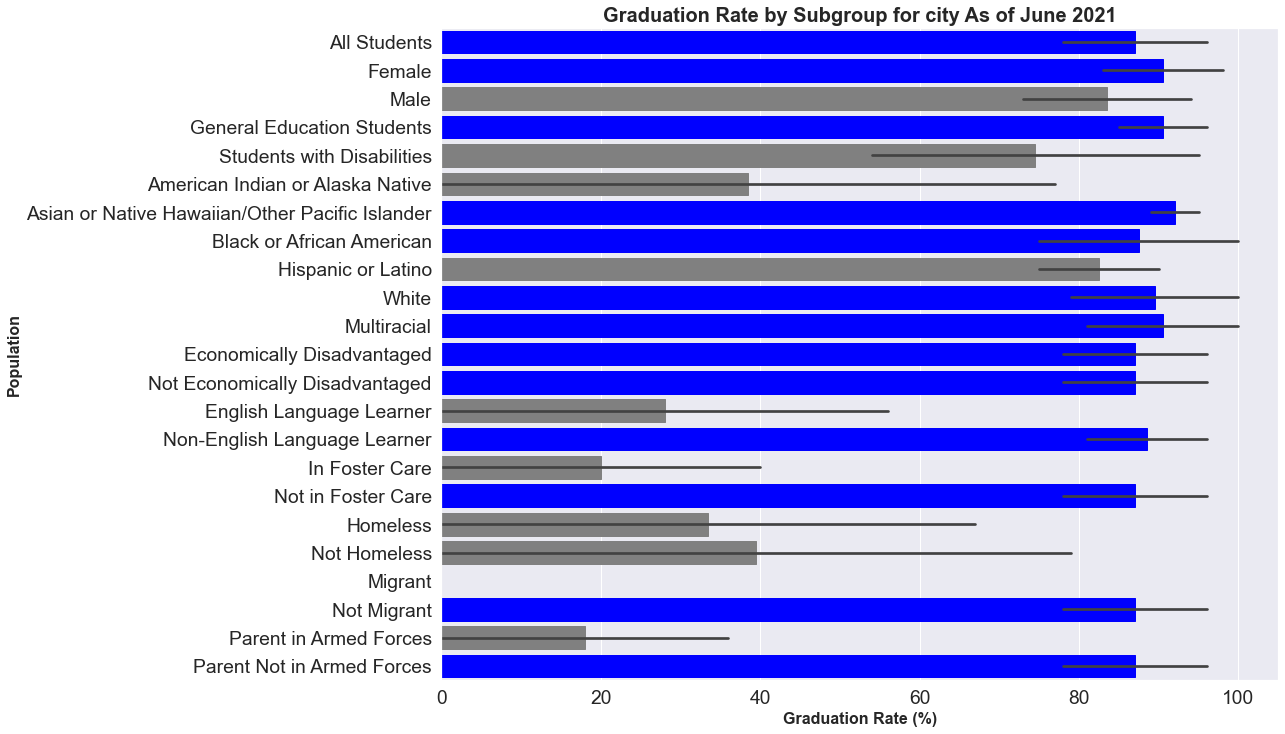

In [48]:
plot_bar(test2, "city", 84)

In [49]:
%%capture
!pip install networkx

In [50]:
from networkx import connected_caveman_graph

In [51]:
from yfiles_jupyter_graphs import GraphWidget

In [52]:
w = GraphWidget()

In [53]:
g = connected_caveman_graph(3, 4)

In [54]:
w.import_graph(g)

In [55]:
w

GraphWidget(layout=Layout(height='500px', width='100%'))

In [56]:
w.set_neighborhood(3, [1])

In [57]:
w

GraphWidget(layout=Layout(height='500px', width='100%'))

In [58]:
retention = pd.read_excel('Data/College-Retention-by-Entering-Cohort.xlsx')

In [59]:
retention.head(52)

State Name  2009  2010  2011  2012  2013  2014  2015  2016  2017  \
0           Alaska  0.50  0.52  0.52  0.53  0.52  0.52  0.51  0.55  0.51   
1          Alabama  0.65  0.63  0.63  0.65  0.66  0.64  0.69  0.69  0.68   
2         Arkansas  0.60  0.59  0.59  0.60  0.60  0.61  0.64  0.63  0.65   
3          Arizona  0.53  0.54  0.53  0.54  0.57  0.60  0.61  0.62  0.61   
4       California  0.60  0.61  0.62  0.65  0.64  0.64  0.65  0.65  0.66   
5         Colorado  0.63  0.61  0.61  0.63  0.63  0.63  0.65  0.66  0.66   
6      Connecticut  0.69  0.69  0.70  0.71  0.71  0.68  0.71  0.72  0.73   
7              D.C  0.85  0.83  0.85  0.83  0.84  0.81  0.81  0.83  0.83   
8         Delaware  0.75  0.75  0.78  0.79  0.77  0.75  0.72  0.71  0.71   
9          Florida  0.67  0.66  0.66  0.67  0.67  0.67  0.68  0.68  0.68   
10         Georgia  0.66  0.64  0.67  0.68  0.69  0.69  0.69  0.69  0.69   
11          Hawaii  0.57  0.58  0.60  0.58  0.58  0.56  0.58  0.60  0.57   
12            Iowa  0.65  0.66  0.65  0.67  0.68  0.69  0.70  0.70  0.70   
13           Idaho  0.59  0.59  0.51  0.54  0.53  0.59  0.61  0.62  0.61   
14        Illinois  0.62  0.62  0.61  0.63  0.64  0.63  0.65  0.66  0.66   
15         Indiana  0.70  0.70  0.66  0.66  0.66  0.65  0.67  0.67  0.68   
16          Kansas  0.59  0.59  0.60  0.54  0.56  0.57  0.61  0.60  0.60   
17        Kentucky  0.59  0.59  0.56  0.57  0.60  0.59  0.63  0.62  0.62   
18       Louisiana  0.63  0.60  0.60  0.62  0.61  0.62  0.58  0.63  0.61   
19   Massachusetts  0.72  0.73  0.73  0.74  0.74  0.74  0.74  0.74  0.75   
20        Maryland  0.60  0.61  0.62  0.63  0.64  0.64  0.65  0.66  0.67   
21           Maine  0.66  0.66  0.66  0.67  0.66  0.66  0.68  0.67  0.68   
22        Michigan  0.63  0.62  0.62  0.64  0.65  0.66  0.67  0.67  0.69   
23       Minnesota  0.65  0.65  0.66  0.66  0.66  0.67  0.67  0.68  0.68   
24        Missouri  0.63  0.64  0.62  0.58  0.62  0.60  0.64  0.63  0.62   
25     Mississippi  0.63  0.62  0.61  0.62  0.63  0.65  0.66  0.65  0.65   
26         Montana  0.61  0.62  0.62  0.61  0.63  0.62  0.62  0.62  0.61   
27  North Carolina  0.65  0.64  0.63  0.64  0.65  0.64  0.66  0.67  0.67   
28    North Dakota  0.71  0.68  0.67  0.68  0.68  0.68  0.70  0.69  0.70   
29        Nebraska  0.61  0.61  0.62  0.62  0.63  0.66  0.67  0.66  0.66   
30   New Hampshire  0.71  0.70  0.71  0.71  0.69  0.67  0.68  0.65  0.67   
31      New Jersey  0.68  0.68  0.69  0.70  0.70  0.71  0.71  0.72  0.72   
32      New Mexico  0.55  0.53  0.54  0.54  0.53  0.55  0.57  0.57  0.58   
33          Nevada  0.56  0.50  0.52  0.55  0.57  0.56  0.63  0.62  0.61   
34        New York  0.71  0.70  0.70  0.71  0.72  0.71  0.71  0.71  0.71   
35            Ohio  0.64  0.62  0.62  0.64  0.67  0.66  0.68  0.68  0.68   
36        Oklahoma  0.54  0.53  0.48  0.54  0.54  0.51  0.61  0.57  0.54   
37          Oregon  0.60  0.61  0.61  0.61  0.61  0.61  0.61  0.63  0.62   
38    Pennsylvania  0.73  0.73  0.73  0.74  0.74  0.74  0.75  0.75  0.75   
39    Rhode Island  0.73  0.74  0.74  0.76  0.76  0.76  0.77  0.78  0.77   
40  South Carolina  0.62  0.62  0.62  0.62  0.62  0.64  0.64  0.64  0.63   
41    South Dakota  0.68  0.68  0.68  0.70  0.69  0.69  0.71  0.71  0.70   
42       Tennessee  0.65  0.64  0.63  0.64  0.65  0.65  0.64  0.67  0.65   
43           Texas  0.60  0.59  0.59  0.59  0.61  0.61  0.63  0.63  0.63   
44            Utah  0.54  0.54  0.53  0.48  0.54  0.52  0.55  0.55  0.56   
45        Virginia  0.66  0.68  0.68  0.69  0.68  0.69  0.70  0.71  0.71   
46         Vermont  0.72  0.69  0.78  0.71  0.73  0.71  0.73  0.73  0.72   
47      Washington  0.61  0.61  0.62  0.64  0.63  0.64  0.65  0.66  0.64   
48       Wisconsin  0.68  0.68  0.69  0.69  0.70  0.68  0.69  0.70  0.70   
49   West Virginia  0.63  0.60  0.59  0.58  0.51  0.51  0.63  0.61  0.58   
50         Wyoming  0.54  0.53  0.54  0.51  0.55  0.57  0.55  0.56  0.54   
51     Multi-State  0.45  0.45  0.44  0.46  0.48  0.47  

In [60]:
import plotly.express as px
fig = px.choropleth(retention,
                    locations='State Name', 
                    locationmode="USA-states", 
                    color=2019,
                    color_continuous_scale="Viridis_r", 
                    scope="usa",
                    animation_frame= 'State Name' )#make sure 'period_begin' is string type and sorted in ascending order

fig.show()

In [84]:
retention_year = pd.read_excel('Data/Retention-by-cohort-year.xlsx')
retention_year

State Name State Symbol  Year  Retention Rate  Persistence
0           Alaska           AK  2009            0.50         0.55
1          Alabama           AL  2009            0.65         0.74
2         Arkansas           AR  2009            0.60         0.68
3          Arizona           AZ  2009            0.53         0.63
4       California           CA  2009            0.60         0.69
..             ...          ...   ...             ...          ...
567     Washington           WA  2019            0.60          nan
568      Wisconsin           WI  2019            0.68          nan
569  West Virginia           WV  2019            0.60          nan
570        Wyoming           WY  2019            0.56          nan
571    Multi-State           MU  2019            0.48          nan

[572 rows x 5 columns]

In [85]:
retention_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State Name      572 non-null    object 
 1   State Symbol    572 non-null    object 
 2   Year            572 non-null    int64  
 3   Retention Rate  572 non-null    float64
 4   Persistence     156 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 22.5+ KB


In [86]:
retention_year = pd.DataFrame(retention_year)

In [87]:
retention_year['Year'] = retention_year['Year'].astype(str)
retention_year['Retention Rate (%)'] = retention_year['Retention Rate']
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [88]:
retention_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State Name          572 non-null    object 
 1   State Symbol        572 non-null    object 
 2   Year                572 non-null    object 
 3   Retention Rate      572 non-null    float64
 4   Persistence         156 non-null    float64
 5   Retention Rate (%)  572 non-null    float64
dtypes: float64(3), object(3)
memory usage: 26.9+ KB


In [89]:
import plotly.express as px

In [90]:
def retention_plot (dataset):
    fig = px.choropleth(dataset, 
                      locations="State Symbol",
                      locationmode="USA-states", 
                      color='Retention Rate', # set the choropleth data to plot
                      hover_name='State Name', # column to add to hover information
                      hover_data = ['Retention Rate'], # data to be displayed when mousing over the map
                      color_continuous_scale="spectral", 
                      scope="usa", 
                      animation_frame = 'Year'
                      )
  

  # set your chart_studio username and api key
  # how to -> https://plotly.com/python/getting-started-with-chart-studio/
    return fig

In [91]:
retention_plot(retention_year)